In [3]:
import sys  
sys.path.insert(0, '/Users/SenaTirpan/Desktop/gitlab-ipvs/humoro')
sys.path.insert(0, '/Users/SenaTirpan/Desktop/gitlab-ipvs/humoro/examples/human_robot_trajopt')
import helpers

from humoro.trajectory import Trajectory

full_traj = Trajectory()

full_traj.loadTrajHDF5("/Users/SenaTirpan/Desktop/gitlab-ipvs/humoro/mogaze/p1_1_human_data.hdf5")

In [4]:
print(full_traj.data.shape[0])

53899


In [5]:
print(full_traj.data.shape[0])

53899


In [ ]:
print(full_traj.description)


In [ ]:
print(full_traj.description.shape)

In [ ]:
print(full_traj.description[0])
print(full_traj.description[1])

In [ ]:
print(list(full_traj.data))

In [ ]:
print(full_traj.data)

In [6]:
from humoro.player_pybullet import Player

pp = Player()

pp.spawnHuman("Human1")
pp.addPlaybackTraj(full_traj, "Human1")

pp.play(duration=360, startframe=3000)

pybullet build time: Dec 10 2021 09:55:40


In [7]:
from humoro.kin_pybullet import HumanKin

kinematic = HumanKin()

In [8]:
baseTransY_id = kinematic.inv_index["baseTransY"]
print("baseTransY position Vec3:")
kinematic.get_position(baseTransY_id)

baseTransY position Vec3:


array([0., 0., 0.])

In [9]:
baseTransZ_id = kinematic.inv_index["baseTransZ"]
print("baseTransZ position Vec3:")
kinematic.get_position(baseTransZ_id)


baseTransZ position Vec3:


array([0., 0., 0.])

In [10]:
baseTransY_id = kinematic.inv_index["baseTransY"]
for i in range (full_traj.data.shape[0]):
    kinematic.set_state(full_traj,i)
    print(kinematic.get_position(baseTransY_id))    

[-0.05464246  0.01331211  0.        ]
[-0.05460808  0.01331375  0.        ]
[-0.05458714  0.01332241  0.        ]
[-0.05456906  0.01331438  0.        ]
[-0.0545433   0.01331967  0.        ]
[-0.0545139   0.01331429  0.        ]
[-0.0544919   0.01331303  0.        ]
[-0.05447078  0.01330213  0.        ]
[-0.05443561  0.01330146  0.        ]
[-0.05442577  0.01329656  0.        ]
[-0.05438487  0.01330489  0.        ]
[-0.05437359  0.01330138  0.        ]
[-0.05434877  0.01328736  0.        ]
[-0.05431855  0.01329075  0.        ]
[-0.05428822  0.01328983  0.        ]
[-0.05425993  0.01327725  0.        ]
[-0.05422177  0.01327847  0.        ]
[-0.05419625  0.01326944  0.        ]
[-0.05416     0.01328224  0.        ]
[-0.05413012  0.01328405  0.        ]
[-0.05409766  0.01328189  0.        ]
[-0.05405552  0.01328952  0.        ]
[-0.05401416  0.0132851   0.        ]
[-0.05397952  0.01328894  0.        ]
[-0.05393547  0.01328736  0.        ]
[-0.05389665  0.01328912  0.        ]
[-0.05386017

In [11]:
import numpy as np
from helpers import SDF

baseTransY_id = kinematic.inv_index["baseTransY"]
vector = np.array(kinematic.get_position(baseTransY_id))
matrix = np.zeros((full_traj.data.shape[0],2))
print(vector)

print(matrix.shape)
#print(vector.data[0])
#print(vector.data[1])

#matrix[0,0] = vector.data[0]

for i in range(full_traj.data.shape[0]):
    kinematic.set_state(full_traj,i)
    vector = np.array(kinematic.get_position(baseTransY_id))
    for j in range(2):
        matrix[i,j] = vector.data[j]
        #matrix[i,j] = vector.data[j]*helpers.SDF.px_per_m        

min_X = 0;

for i in range(full_traj.data.shape[0]):
    if(matrix[i][0] < min_X):
        min_X = matrix[i][0]

min_Y = 0;

for i in range(full_traj.data.shape[0]):
    if(matrix[i][1] < min_Y):
        min_Y = matrix[i][1]

#print(matrix[0][i].min())  # -1.057856798171997    
print("--------")
print(min_X)  # -1.057856798171997

print("--------")
print(min_Y)  # -0.43058595061302185

for i in range(full_traj.data.shape[0]):
    matrix[i][0] += (-1*min_X)
    matrix[i][1] += (-1*min_Y)
    
print(matrix.min()) # 0.0

min_X2 = 150;

for i in range(full_traj.data.shape[0]):
    if(matrix[i][0] > min_X2):
        min_X2 = matrix[i][0]

min_Y2 = 150;

for i in range(full_traj.data.shape[0]):
    if(matrix[i][1] > min_Y2):
        min_Y2 = matrix[i][1]

print("new mins")
print(min_X2) # 0.0
print(min_Y2) #0.0

print(matrix.shape)  
print(matrix)

for i in range(full_traj.data.shape[0]):
    #for j in range(2):
        #matrix[i,j] *= helpers.SDF.px_per_m 
    matrix[i,:] = helpers.SDF.m_to_pix(matrix[i,:])

print("after the pixel world")
print(matrix)

for i in range(full_traj.data.shape[0]):
    for j in range(2):
        matrix[i,j] = int(matrix[i,j])
                        
print("after int() for index")
print(matrix)

[-0.0633954   1.69972038  0.        ]
(53899, 2)
--------
-1.057856798171997
--------
-0.43058595061302185
0.0
new mins
150
150
(53899, 2)
[[1.00321434 0.44389806]
 [1.00324871 0.4438997 ]
 [1.00326966 0.44390836]
 ...
 [0.99443242 2.13028786]
 [0.99444711 2.13029835]
 [0.99446139 2.13030633]]
after the pixel world
[[ 49.91964148  73.59745153]
 [ 49.91878215  73.59749258]
 [ 49.91825847  73.59770909]
 ...
 [ 50.13918951 115.7571964 ]
 [ 50.1388222  115.75745866]
 [ 50.13846513 115.75765833]]
after int() for index
[[ 49.  73.]
 [ 49.  73.]
 [ 49.  73.]
 ...
 [ 50. 115.]
 [ 50. 115.]
 [ 50. 115.]]


In [12]:
print(matrix)

[[ 49.  73.]
 [ 49.  73.]
 [ 49.  73.]
 ...
 [ 50. 115.]
 [ 50. 115.]
 [ 50. 115.]]


132.0
75.0


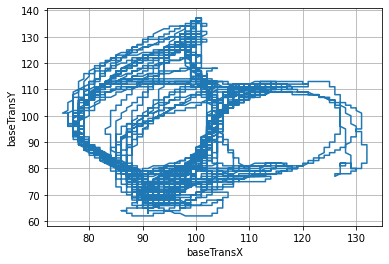

In [13]:
import numpy as np
import matplotlib.pyplot as plt

baseTransX = [row[0] for row in matrix]
baseTransY = [row[1] for row in matrix]

x = baseTransX

for i in range(len(baseTransX)):
    baseTransX[i] = 150 - baseTransX[i]
    
print(max(baseTransX))
print(min(baseTransX))

y = baseTransY

plt.xlabel('baseTransX') 
plt.ylabel('baseTransY') 

plt.plot(x, y)
plt.grid()
plt.show()



<class 'numpy.ndarray'>


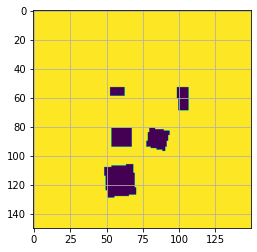

In [14]:
from humoro.load_scenes import autoload_objects

obj_trajs, obj_names = autoload_objects(pp, "/Users/SenaTirpan/Desktop/gitlab-ipvs/humoro/mogaze/p1_1_object_data.hdf5", "/Users/SenaTirpan/Desktop/gitlab-ipvs/humoro/mogaze/scene.xml")

pp.play(duration=360, startframe=3000)
img = pp.getFrame2d(3100)

print(type(img)) 
plt.grid()
plt.imshow(img)



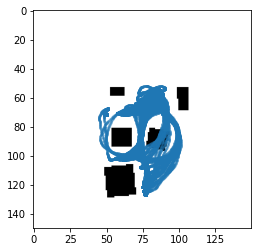

In [15]:
img_2d = pp.getFrame2d(full_traj.startframe)
plt.clf()
plt.imshow(img_2d, cmap="gray")
hs_plotpoints = helpers.SDF.m_to_pix(full_traj.data[:, :2])
plt.plot(hs_plotpoints[:, 0], hs_plotpoints[:, 1], label="human", marker='.', alpha=.3, ms=5, linestyle = 'None', markeredgecolor='None')

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
(53899, 2)
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


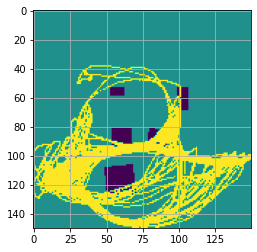

In [50]:
print(img)

#imgWithTraj = img

#print(imgWithTraj)

print(matrix.shape)

for i in range(full_traj.data.shape[0]):
    j = 0
    #x = int(matrix[i, j])
    #y = int(matrix[i, j+1])
    x = int(baseTransX[i])
    y = int(baseTransY[i])
    if(y == 150 or x == 150):
        continue
    img[x, y] = 2

print(img)
plt.grid()
plt.imshow(img)

In [30]:
import pandas as pd

df = pd.DataFrame(img)

df.to_hdf("/Users/SenaTirpan/Desktop/myInput.h5", "/data/d1");

In [ ]:
np.savetxt('/Users/SenaTirpan/Desktop/myDataPixel.csv', matrix, delimiter=',')

In [ ]:
import pandas as pd

df = pd.read_csv("/Users/SenaTirpan/Desktop/myData.csv", sep=",", header=None)
print(df)

col_names = ['baseTransX', 'baseTransY']
df.columns = col_names

for col in col_names:
    df[col] = df[col].astype(float)

print(df.shape)
    
df.head()   